In [45]:
import requests
import PyPDF2
import os
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#Downloading the pdf file
file_url = "https://www.brookings.edu/wp-content/uploads/2020/09/UNESCO-Kim-Care_Africa-ministudy-2020.pdf"

# Get the actual filename from the URL
filename = os.path.basename(file_url)

# Find the position of '.pdf' in the filename and keep only the characters before that position
if '.pdf' in filename:
    filename = filename[:filename.index('.pdf') + 4]

#Create the pdf file locally
r = requests.get(file_url, stream = True)

with open(filename,"wb") as pdf:
    for chunk in r.iter_content(chunk_size=1024):
        '''
        writing one chunk as a time to pdf file
        '''
        if chunk:
            pdf.write(chunk)

# Open PDF file
pdffileObj = open(filename, 'rb')

# Create PDF reader object
pdfReader = PyPDF2.PdfReader(pdffileObj)

# Get the total number of pages in the PDF
num_pages = len(pdfReader.pages)
print("Total number of pages:", num_pages)

# Initialize an empty variable to store the extracted text
all_text = ""

# Loop through each page and extract text
for page_num in range(num_pages):
    # Create a page object for the current page
    pageObj = pdfReader.pages[page_num]
    
    # Extract text from the page
    text = pageObj.extract_text()
    
    # Append the extracted text to the 'all_text' variable
    all_text += text

# Print the combined text from all pages
print("Combined Text:", all_text)

# Close the PDF file object
pdffileObj.close()

Total number of pages: 64
Combined Text: Capturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
United Nations
Educational, Scientiﬁc and
Cultural Organization
Dakar
Regional Office
Capturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesCapturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
Helyn Kim and Esther CareCapturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesEducation 
Sector
United Nations
(GXFDWLRQDO6FLHQWL¿FDQG
Cultural OrganizationThe Global Education 2030 Agenda
UNESCO, as the United Nations’ specialized 
agency for education, is entrusted to lead and 
coordinate the Education 2030 Agenda, which is part of a global movement to eradicate poverty through 17 Sustainable Development Goals by 
2030. Education, essential to achieve all of these 
goals, has its own dedicated Goal 4, which aims to “ensure 

In [46]:
all_text.splitlines()
sentiment = all_text.split()
print(sentiment)

['Capturing', '21st', 'century', 'skills', 'Analysis', 'of', 'assessments', 'in', 'selected', 'sub-Saharan', 'African', 'countries', 'United', 'Nations', 'Educational,', 'Scientiﬁc', 'and', 'Cultural', 'Organization', 'Dakar', 'Regional', 'Office', 'Capturing', '21st', 'Century', 'Skills:', 'Development', 'of', 'Assessments', 'in', 'Selected', 'sub-Saharan', 'African', 'CountriesCapturing', '21st', 'century', 'skills', 'Analysis', 'of', 'assessments', 'in', 'selected', 'sub-Saharan', 'African', 'countries', 'Helyn', 'Kim', 'and', 'Esther', 'CareCapturing', '21st', 'Century', 'Skills:', 'Development', 'of', 'Assessments', 'in', 'Selected', 'sub-Saharan', 'African', 'CountriesEducation', 'Sector', 'United', 'Nations', '(GXFDWLRQDO\x0f\x036FLHQWL¿F\x03DQG', 'Cultural', 'OrganizationThe', 'Global', 'Education', '2030', 'Agenda', 'UNESCO,', 'as', 'the', 'United', 'Nations’', 'specialized', 'agency', 'for', 'education,', 'is', 'entrusted', 'to', 'lead', 'and', 'coordinate', 'the', 'Education

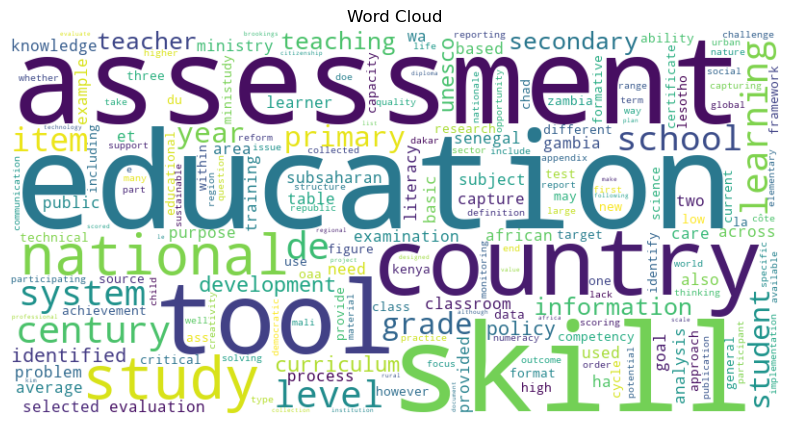

In [47]:
import nltk

#nltk.download('omw-1.4')

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample list of words
word_list = sentiment

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Create a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Count the occurrence of each relevant word (ignoring capitalization, punctuation, and numbers)
word_counts = {}
for word in word_list:
    # Convert the word to lowercase for case-insensitive comparison
    word = word.lower()

    # Remove punctuation from the word
    word = word.translate(translator)

    # Lemmatize the word to get its base form (singular)
    word = lemmatizer.lemmatize(word)

    # Check if the lowercase word is in the stop words set and if it contains only alphabetic characters
    if word not in stop_words and word.isalpha():
        word_counts[word] = word_counts.get(word, 0) + 1

# Prepare data for plotting
words = list(word_counts.keys())
counts = list(word_counts.values())

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Prepare data for word cloud
wordcloud_data = dict(zip(words, counts))

# Create word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [48]:
#Open and Read all Training Data

with open ('trainset/Roles/Accountants.txt', "r") as f:
    Accountants = f.read().splitlines()

with open ('trainset/Roles/Artists.txt', "r") as f:
    Artists = f.read().splitlines()

with open ('trainset/Roles/Books and Literature.txt', "r") as f:
    BooksLiterature = f.read().splitlines()

with open ('trainset/Roles/Business Owners.txt', "r") as f:
    BusinessOwners = f.read().splitlines()

with open ('trainset/Roles/Charitable Trusts and NGOs.txt', "r") as f:
    CharitableTrustsNGOs = f.read().splitlines()

with open ('trainset/Roles/Consumer Services.txt', "r") as f:
    ConsumerServices = f.read().splitlines()

with open ('trainset/Roles/Counselors.txt', "r") as f:
    Counselors = f.read().splitlines()

with open ('trainset/Roles/Doctors.txt', "r") as f:
    Doctors = f.read().splitlines()

with open ('trainset/Roles/Estate Agents.txt', "r") as f:
    EstateAgents = f.read().splitlines()

with open ('trainset/Roles/Family Offices.txt', "r") as f:
    FamilyOffices = f.read().splitlines()

with open ('trainset/Roles/Financial Advisors.txt', "r") as f:
    FinancialAdvisors = f.read().splitlines()

with open ('trainset/Roles/Franchise Operations.txt', "r") as f:
    FranchiseOperations = f.read().splitlines()

with open ('trainset/Roles/Goods Suppliers.txt', "r") as f:
    GoodsSuppliers = f.read().splitlines()

with open ('trainset/Roles/Governments.txt', "r") as f:
    Governments = f.read().splitlines()

with open ('trainset/Roles/Hospitals.txt', "r") as f:
    Hospitals = f.read().splitlines()

with open ('trainset/Roles/Independent Consultants.txt', "r") as f:
    IndependentConsultants = f.read().splitlines()

with open ('trainset/Roles/Individuals.txt', "r") as f:
    Individuals = f.read().splitlines()

with open ('trainset/Roles/Intergovernmental and Regulators.txt', "r") as f:
    IntergovernmentalRegulators = f.read().splitlines()
    
with open ('trainset/Roles/International Institutions.txt', "r") as f:
    InternationalInstitutions = f.read().splitlines()

with open ('trainset/Roles/Lawyers.txt', "r") as f:
    Lawyers = f.read().splitlines()
    
with open ('trainset/Roles/Manufacturers.txt', "r") as f:
    Manufacturers = f.read().splitlines()

with open ('trainset/Roles/Multi Nationals.txt', "r") as f:
    MultiNationals = f.read().splitlines()
    
with open ('trainset/Roles/Municipalities and Cities.txt', "r") as f:
    MunicipalitiesCities = f.read().splitlines()

with open ('trainset/Roles/Online ReSellers.txt', "r") as f:
    OnlineReSellers = f.read().splitlines()

with open ('trainset/Roles/Organizations.txt', "r") as f:
    Organizations = f.read().splitlines()

with open ('trainset/Roles/Parents.txt', "r") as f:
    Parents = f.read().splitlines()
    
with open ('trainset/Roles/Philanthropies and Foundations.txt', "r") as f:
    PhilanthropiesFoundations = f.read().splitlines()

with open ('trainset/Roles/Politicians.txt', "r") as f:
    Politicians = f.read().splitlines()
    
with open ('trainset/Roles/Private Corporations.txt', "r") as f:
    PrivateCorporations = f.read().splitlines()

with open ('trainset/Roles/Professionals.txt', "r") as f:
    Professionals = f.read().splitlines()
    
with open ('trainset/Roles/Public Companies.txt', "r") as f:
    PublicCompanies = f.read().splitlines()

with open ('trainset/Roles/Regional Governments.txt', "r") as f:
    RegionalGovernments = f.read().splitlines()

with open ('trainset/Roles/Restaurants.txt', "r") as f:
    Restaurants = f.read().splitlines()

with open ('trainset/Roles/Retail Shops.txt', "r") as f:
    RetailShops = f.read().splitlines()
    
with open ('trainset/Roles/Seniors.txt', "r") as f:
    Seniors = f.read().splitlines()

with open ('trainset/Roles/Service Vendors.txt', "r") as f:
    ServiceVendors = f.read().splitlines()
    
with open ('trainset/Roles/Singles.txt', "r") as f:
    Singles = f.read().splitlines()

with open ('trainset/Roles/Sports Persons.txt', "r") as f:
    SportsPersons = f.read().splitlines()
    
with open ('trainset/Roles/Students.txt', "r") as f:
    Students = f.read().splitlines()

with open ('trainset/Roles/Universities.txt', "r") as f:
    Universities = f.read().splitlines()

In [49]:
data = {}
data["Accountants"] = Accountants
data["Artists"] = Artists
data["Books and Literature"] = BooksLiterature
data["Business Owners"] = BusinessOwners
data["Charitable Trusts and NGOs"] = CharitableTrustsNGOs
data["Consumer Services"] = ConsumerServices
data["Counselors"] = Counselors
data["Doctors"] = Doctors
data["Estate Agents"] = EstateAgents
data["Family Offices"] = FamilyOffices
data["Financial Advisors"] = FinancialAdvisors
data["Franchise Operations"] = FranchiseOperations
data["Goods Suppliers"] = GoodsSuppliers
data["Governments"] = Governments
data["Hospitals"] = Hospitals
data["Independent Consultants"] = IndependentConsultants
data["Individuals"] = Individuals
data["Intergovernmental and Regulators"] = IntergovernmentalRegulators
data["International Institutions"] = InternationalInstitutions
data["Lawyers"] = Lawyers
data["Manufacturers"] = Manufacturers
data["Multi Nationals"] = MultiNationals
data["Municipalities and Cities"] = MunicipalitiesCities
data["Online Re-Sellers"] = OnlineReSellers
data["Organizations"] = Organizations
data["Parents"] = Parents
data["Philanthropies and Foundations"] = PhilanthropiesFoundations
data["Politicians"] = Politicians
data["Private Corporations"] = PrivateCorporations
data["Professionals"] = Professionals
data["Public Companies"] = PublicCompanies
data["Regional Governments"] = RegionalGovernments
data["Restaurants"] = Restaurants
data["Retail Shops"] = RetailShops
data["Seniors"] = Seniors
data["Service Vendors"] = ServiceVendors
data["Singles"] = Singles
data["Sports Persons"] = SportsPersons
data["Students"] = Students
data["Universities"] = Universities
data

{'Accountants': ['John Smith is a certified public accountant (CPA) specializing in tax planning and preparation.',
  'Sarah Johnson is an experienced accountant providing bookkeeping and financial statement preparation services.',
  'David Brown is a management accountant who assists companies in analyzing financial data and making strategic decisions.',
  'Emma Roberts is an accountant with expertise in forensic accounting and fraud examination.',
  'Mark Thompson is a certified management accountant (CMA) offering cost analysis and budgeting services.',
  'Laura Williams is an accountant specializing in payroll management and compliance.',
  'Michael Davis is an accountant who provides auditing and assurance services to businesses.',
  'Jennifer Lee is a tax accountant helping individuals and businesses navigate complex tax laws and regulations.',
  'Robert Wilson is a certified financial planner (CFP) offering comprehensive financial planning services.',
  'Lisa Turner is an accoun

In [50]:
import spacy
import classy_classification

#Apply Classy Model
nlp = spacy.blank("en")
nlp.add_pipe(
    "text_categorizer", 
    config={
        "data": data, 
        "model": "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "device": "cpu"
    }
) 

print(nlp("Role Classifications")._.cats)

{'Accountants': 0.030115604251987973, 'Artists': 0.08216027596198365, 'Books and Literature': 0.044324630578720686, 'Business Owners': 0.01612523365401951, 'Charitable Trusts and NGOs': 0.010185990176261844, 'Consumer Services': 0.039008916097356065, 'Counselors': 0.06617186479522476, 'Doctors': 0.009504928383139506, 'Estate Agents': 0.009832542543739936, 'Family Offices': 0.008395936274026268, 'Financial Advisors': 0.02102613311152365, 'Franchise Operations': 0.08675291492799642, 'Goods Suppliers': 0.022233145466171198, 'Governments': 0.005708233369716634, 'Hospitals': 0.00749873864418162, 'Independent Consultants': 0.028492849985065592, 'Individuals': 0.01869040774735287, 'Intergovernmental and Regulators': 0.03714917937270034, 'International Institutions': 0.008918558327943391, 'Lawyers': 0.019443266803176523, 'Manufacturers': 0.06030630971652289, 'Multi Nationals': 0.010470597426853617, 'Municipalities and Cities': 0.011198868458625343, 'Online Re-Sellers': 0.015059071723137474, 'O

In [51]:
sentence_model = spacy.blank("en")
sentence_model.add_pipe("sentencizer")

In [52]:
segment_size = 100000  # Define the desired segment size

num_segments = len(all_text) // segment_size + 1  # Calculate the number of segments

final_data = []

for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size
    segment = all_text[start_idx:end_idx]

    sentences = sentence_model(segment)

    for sentence in sentences.sents:
        doc = nlp(sentence.text)
        final_data.append({"sentence": doc.text, "cats": doc._.cats})

In [53]:
#Show Sample score per Sentence
for item in final_data:
    print (item["sentence"])
    print ("Accountants",item["cats"]["Accountants"])
    print ("Artists",item["cats"]["Artists"])
    print ("Books and Literature",item["cats"]["Books and Literature"])
    print ("Business Owners",item["cats"]["Business Owners"])
    print ("Charitable Trusts and NGOs",item["cats"]["Charitable Trusts and NGOs"])
    print ("Consumer Services",item["cats"]["Consumer Services"])
    print ("Counselors",item["cats"]["Counselors"])
    print ("Doctors",item["cats"]["Doctors"])
    print ("Estate Agents",item["cats"]["Estate Agents"])
    print ("Family Offices",item["cats"]["Family Offices"])
    print ("Financial Advisors",item["cats"]["Financial Advisors"])
    print ("Franchise Operations",item["cats"]["Franchise Operations"])
    print ("Goods Suppliers",item["cats"]["Goods Suppliers"])
    print ("Governments",item["cats"]["Governments"])
    print ("Hospitals",item["cats"]["Hospitals"])
    print ("Independent Consultants",item["cats"]["Independent Consultants"])
    print ("Individuals",item["cats"]["Individuals"])
    print ("Intergovernmental and Regulators",item["cats"]["Intergovernmental and Regulators"])
    print ("International Institutions",item["cats"]["International Institutions"])
    print ("Lawyers",item["cats"]["Lawyers"])
    print ("Manufacturers",item["cats"]["Manufacturers"])
    print ("Multi Nationals",item["cats"]["Multi Nationals"])
    print ("Municipalities and Cities",item["cats"]["Municipalities and Cities"])
    print ("Online Re-Sellers",item["cats"]["Online Re-Sellers"])
    print ("Organizations",item["cats"]["Organizations"])
    print ("Parents",item["cats"]["Parents"])
    print ("Philanthropies and Foundations",item["cats"]["Philanthropies and Foundations"])
    print ("Politicians",item["cats"]["Politicians"])
    print ("Private Corporations",item["cats"]["Private Corporations"])
    print ("Professionals",item["cats"]["Professionals"])
    print ("Public Companies",item["cats"]["Public Companies"])
    print ("Regional Governments",item["cats"]["Regional Governments"])
    print ("Restaurants",item["cats"]["Restaurants"])
    print ("Retail Shops",item["cats"]["Retail Shops"])
    print ("Seniors",item["cats"]["Seniors"])
    print ("Service Vendors",item["cats"]["Service Vendors"])
    print ("Singles",item["cats"]["Singles"])
    print ("Sports Persons",item["cats"]["Sports Persons"])
    print ("Students",item["cats"]["Students"])
    print ("Universities",item["cats"]["Universities"])


Capturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
United Nations
Educational, Scientiﬁc and
Cultural Organization
Dakar
Regional Office
Capturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesCapturing 21st century skills
Analysis of assessments in selected
sub-Saharan African countries
Helyn Kim and Esther CareCapturing 21st Century Skills:  Development of Assessments in Selected sub-Saharan African CountriesEducation 
Sector
United Nations
(GXFDWLRQDO6FLHQWL¿FDQG
Cultural OrganizationThe Global Education 2030 Agenda
UNESCO, as the United Nations’ specialized 
agency for education, is entrusted to lead and 
coordinate the Education 2030 Agenda, which is part of a global movement to eradicate poverty through 17 Sustainable Development Goals by 
2030.
Accountants 0.012766131704898155
Artists 0.03605658478469426
Books and Literature 0.026276416198608026
Business Owners 0.009449414974309898
Charit

Regional Governments 0.043069620913726216
Restaurants 0.006178660386901958
Retail Shops 0.013035023450826095
Seniors 0.01926722302750601
Service Vendors 0.02389683529822792
Singles 0.00998781959441927
Sports Persons 0.010753229763332997
Students 0.09471817436754937
Universities 0.029317882063416942

At the end of each phase, learners take end of level 
assessments.
Accountants 0.015904438179888635
Artists 0.018765488586153886
Books and Literature 0.02923665384206603
Business Owners 0.00774730284099376
Charitable Trusts and NGOs 0.014418546768078905
Consumer Services 0.2637453149538491
Counselors 0.025449574907245396
Doctors 0.0092827872769372
Estate Agents 0.0025278984862827387
Family Offices 0.007702923422433768
Financial Advisors 0.028508131510572094
Franchise Operations 0.014933665808008742
Goods Suppliers 0.011853974855744498
Governments 0.010987070641376844
Hospitals 0.017864745319574066
Independent Consultants 0.006449768360665782
Individuals 0.017590126469384907
Intergovernmenta

In [54]:
import pandas as pd

# Assuming 'final_data' is a list of dictionaries with keys "sentence" and "cats" for each sentence

# Extract the "sentence" and "cats" data from the final_data list, and trim spaces
sentences = [item["sentence"].strip() for item in final_data]
categories_data = [item["cats"] for item in final_data]

# Create the DataFrame with the "Sentence" column
df_cat = pd.DataFrame({"Sentence": sentences})

# Add the category columns to the DataFrame
category_columns = [
"Accountants",
"Artists",
"Books and Literature",
"Business Owners",
"Charitable Trusts and NGOs",
"Consumer Services",
"Counselors",
"Doctors",
"Estate Agents",
"Family Offices",
"Financial Advisors",
"Franchise Operations",
"Goods Suppliers",
"Governments",
"Hospitals",
"Independent Consultants",
"Individuals",
"Intergovernmental and Regulators",
"International Institutions",
"Lawyers",
"Manufacturers",
"Multi Nationals",
"Municipalities and Cities",
"Online Re-Sellers",
"Organizations",
"Parents",
"Philanthropies and Foundations",
"Politicians",
"Private Corporations",
"Professionals",
"Public Companies",
"Regional Governments",
"Restaurants",
"Retail Shops",
"Seniors",
"Service Vendors",
"Singles",
"Sports Persons",
"Students",
"Universities"
]

for category in category_columns:
    df_cat[category] = [data[category] for data in categories_data]

# Convert the probability values to percentages and round to two decimal places
#df_cat[category_columns] = (df_cat[category_columns] * 100).round(2).astype(str) + "%"
df_cat[category_columns] = (df_cat[category_columns] * 100).round(6)

# Add a new column with the category_column name that has the highest value
df_cat['Category_Tag'] = df_cat[category_columns].idxmax(axis=1)

# Add a new column for the Filename
df_cat['Filename'] = filename

# Print the final DataFrame
print(df_cat)

# Generate the CSV file path
csv_filename = os.path.join("dataset", "RoleClassification.csv")

# Create the 'dataset' directory if it doesn't exist
os.makedirs(os.path.dirname(csv_filename), exist_ok=True)

# Check if the CSV file already exists
if os.path.exists(csv_filename):
    # Load the existing CSV file into a DataFrame
    df_existing = pd.read_csv(csv_filename)
    # Assume df_cat is the new DataFrame you want to append
    # Append the new data to the existing DataFrame
    df_combined = pd.concat([df_existing, df_cat], ignore_index=True)
else:
    # If the CSV file doesn't exist, just save the new DataFrame directly
    df_combined = df_cat

# Save the combined DataFrame to the CSV file
df_combined.to_csv(csv_filename, index=False)

                                               Sentence  Accountants  \
0     Capturing 21st century skills\nAnalysis of ass...     1.276613   
1     Education, essential to achieve all of these \...     0.863943   
2     The Education 2030 Framework for Action provid...     1.262992   
3     UNESCO Education Sector\nEducation is UNESCO’s...     0.495541   
4     UNESCO is the United Nations’ specialized agen...     0.660796   
...                                                 ...          ...   
1008                                                 2.     0.896746   
1009  OAA mini-study – Definition of concepts, UNESC...     1.052728   
1010  The authors, in collaboration with national re...     1.484511   
1011  This publication \nis one of the few in the re...     0.701198   
1012                                                        0.598067   

       Artists  Books and Literature  Business Owners  \
0     3.605658              2.627642         0.944941   
1     1.767862       

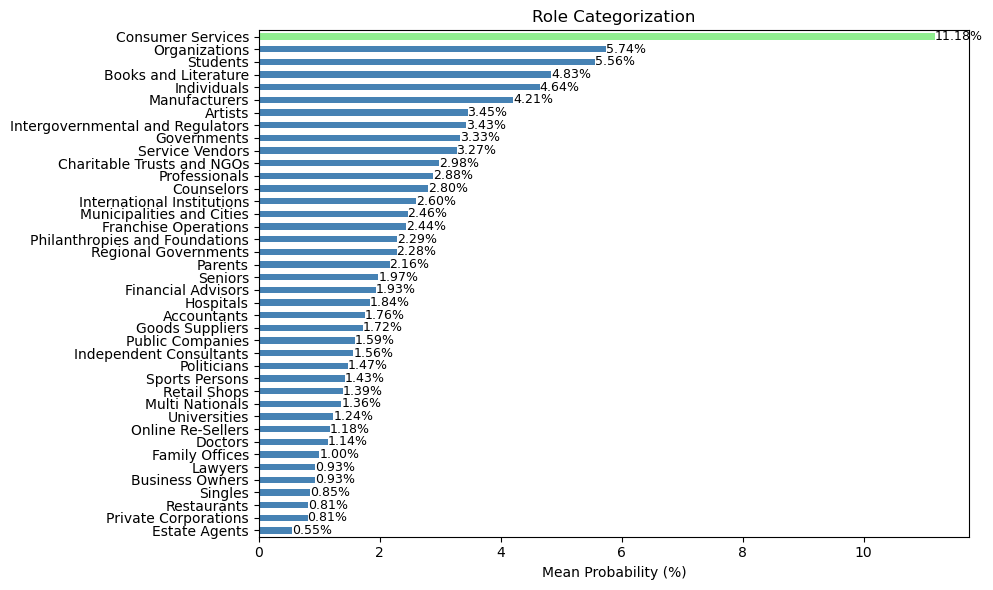

In [55]:
import matplotlib.pyplot as plt

# Calculate the mean probabilities for each category and sort them in descending order
mean_probs = df_cat[category_columns].mean().sort_values(ascending=False)

# Set the color of the highest bar to skyblue and the others to default blue
colors = ['lightgreen' if category == mean_probs.idxmax() else 'steelblue' for category in mean_probs.index]

# Create a horizontal bar chart with data labels
plt.figure(figsize=(10, 6))
mean_probs.plot(kind='barh', color=colors)
plt.title('Role Categorization')
plt.xlabel('Mean Probability (%)')
#plt.ylabel('Category')
plt.xticks(rotation=0)
for index, value in enumerate(mean_probs):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=9)

plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar at the top
plt.tight_layout()
plt.show()